In [1]:
%pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
points_table = pd.read_csv('points_table.csv')
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')


In [4]:
points_table.head(10)

,Ranking,Team,Matches,Won,Lost,Tie,No Results,Points,Net Run Rate,For,Against
0,1,India,9,9,0,0,0,18,2.570,2523/396.2,1708/450.0
1,2,South Africa,9,7,2,0,0,14,1.261,2685/437.5,2158/443.0
2,3,Australia,9,7,2,0,0,14,0.841,2631/426.5,2349/441.2
3,4,New Zealand,9,5,4,0,0,10,0.743,2315/378.0,2279/423.3
4,5,Pakistan,9,4,5,0,0,8,-0.199,2328/406.2,2385/402.2
5,6,Afghanistan,9,4,5,0,0,8,-0.336,2095/425.5,2176/414.0
6,7,England,9,3,6,0,0,6,-0.572,2245/450.0,2291/412.0
7,8,Bangladesh,9,2,7,0,0,4,-1.087,2053/425.5,2431/411.3
8,9,Sri Lanka,9,2,7,0,0,4,-1.419,2048/424.0,2459/393.3
9,10,Netherlands,9,2,7,0,0,4,-1.825,1862/443.0,2549/422.5


In [5]:
matches.head(15)

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,NaN,9.0,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,NaN,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,NaN,6.0,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102.0,NaN,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,NaN,6.0,Group
5,2023/24,New Zealand,Netherlands,2023/10/09,6,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,MJ Santner,PR Reiffel,RJ Tucker,Nitin Menon,AJ Pycroft,New Zealand,99.0,NaN,Group
6,2023/24,England,Bangladesh,2023/10/10,7,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,DJ Malan,Ahsan Raza,P Wilson,HDPK Dharmasena,J Srinath,England,137.0,NaN,Group
7,2023/24,Sri Lanka,Pakistan,2023/10/10,8,Rajiv Gandhi International Stadium,Hyderabad,Sri Lanka,bat,Mohammad Rizwan,AG Wharf,CB Gaffaney,RJ Tucker,AJ Pycroft,Pakistan,NaN,6.0,Group
8,2023/24,Afghanistan,India,2023/10/11,9,Arun Jaitley Stadium,Delhi,Afghanistan,bat,RG Sharma,MA Gough,PR Reiffel,Sharfuddoula,JJ Crowe,India,NaN,8.0,Group
9,2023/24,South Africa,Australia,2023/10/12,10,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Australia,field,Q de Kock,JS Wilson,RK Illingworth,CM Brown,J Srinath,South Africa,134.0,NaN,Group


In [6]:
deliveries.head(20)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.1,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.2,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.3,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.5,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,0.6,England,New Zealand,JM Bairstow,DJ Malan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,1.1,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,1.2,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,1.3,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,2023/24,2023-10-05,"Narendra Modi Stadium, Ahmedabad",1,1.4,England,New Zealand,DJ Malan,JM Bairstow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
matches.describe()

,match_number,winner_runs,winner_wickets
count,48.00,24.000000,24.000000
mean,24.50,125.916667,5.916667
std,14.00,82.242968,2.019829
min,1.00,5.000000,1.000000
25%,12.75,69.750000,5.000000
50%,24.50,101.000000,6.000000
75%,36.25,160.000000,7.250000
max,48.00,309.000000,9.000000


In [8]:
deliveries.describe()

,match_id,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty
count,26119.000000,26119.000000,26119.000000,26119.000000,26119.000000,665.000000,56.0,38.000000,193.000000,1.0
mean,24.586508,1.448869,22.647490,0.896933,0.046403,1.218045,1.0,2.342105,1.305699,5.0
std,13.996713,0.497388,13.742176,1.399963,0.293624,0.853222,0.0,1.475499,0.850746,NaN
min,1.000000,1.000000,0.100000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0
25%,12.000000,1.000000,10.600000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0
50%,24.000000,1.000000,22.100000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,5.0
75%,37.000000,2.000000,34.100000,1.000000,0.000000,1.000000,1.0,4.000000,1.000000,5.0
max,48.000000,2.000000,49.900000,6.000000,5.000000,5.000000,1.0,4.000000,4.000000,5.0


In [9]:
points_table.describe()

,Ranking,Matches,Won,Lost,Tie,No Results,Points,Net Run Rate
count,10.00000,10.0,10.000000,10.000000,10.0,10.0,10.000000,10.000000
mean,5.50000,9.0,4.500000,4.500000,0.0,0.0,9.000000,-0.002300
std,3.02765,0.0,2.460804,2.460804,0.0,0.0,4.921608,1.352353
min,1.00000,9.0,2.000000,0.000000,0.0,0.0,4.000000,-1.825000
25%,3.25000,9.0,2.250000,2.500000,0.0,0.0,4.500000,-0.958250
50%,5.50000,9.0,4.000000,5.000000,0.0,0.0,8.000000,-0.267500
75%,7.75000,9.0,6.500000,6.750000,0.0,0.0,13.000000,0.816500
max,10.00000,9.0,9.000000,7.000000,0.0,0.0,18.000000,2.570000


In [10]:
# Handle missing values
points_table.fillna(0, inplace=True)
matches.fillna('', inplace=True)
deliveries.fillna(0, inplace=True)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

matches['team1'] = le.fit_transform(matches['team1'])
matches['team2'] = le.fit_transform(matches['team2'])
matches['venue'] = le.fit_transform(matches['venue'])
matches['city'] = le.fit_transform(matches['city'])
matches['toss_winner'] = le.fit_transform(matches['toss_winner'])
matches['toss_decision'] = le.fit_transform(matches['toss_decision'])
matches['player_of_match'] = le.fit_transform(matches['player_of_match'])
matches['winner'] = le.fit_transform(matches['winner'])

deliveries['batting_team'] = le.fit_transform(deliveries['batting_team'])
deliveries['bowling_team'] = le.fit_transform(deliveries['bowling_team'])
deliveries['striker'] = le.fit_transform(deliveries['striker'])
deliveries['non_striker'] = le.fit_transform(deliveries['non_striker'])
deliveries['bowler'] = le.fit_transform(deliveries['bowler'])




C:\Users\Data Care Services\AppData\Local\Temp\ipykernel_10168\539405126.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  matches.fillna('', inplace=True)


In [11]:
total_runs = deliveries.groupby('batting_team')['runs_off_bat'].sum().reset_index()
total_runs.columns = ['batting_team', 'total_runs']
deliveries = deliveries.merge(total_runs, on='batting_team', how='left')

print("Total Runs per Team:")
print(total_runs.head())


Total Runs per Team:
   batting_team  total_runs
0             0        1990
1             1        2945
2             2        1944
3             3        2135
4             4        3038


In [12]:
total_wickets = deliveries.groupby('bowler')['player_dismissed'].count().reset_index()
total_wickets.columns = ['bowler', 'total_wickets']
deliveries = deliveries.merge(total_wickets, on='bowler', how='left')

print("Total Wickets per Bowler:")
print(total_wickets.head())


Total Wickets per Bowler:
   bowler  total_wickets
0       0            476
1       1            585
2       2            148
3       3            135
4       4            113


In [13]:
bowler_runs = deliveries.groupby('bowler')['runs_off_bat'].sum().reset_index()
bowler_overs = deliveries.groupby('bowler')['ball'].count().reset_index()
bowler_overs['overs'] = bowler_overs['ball'] // 6
bowler_stats = bowler_runs.merge(bowler_overs, on='bowler')
bowler_stats['economy_rate'] = bowler_stats['runs_off_bat'] / bowler_stats['overs']
bowler_stats.columns = ['bowler', 'total_runs_conceded', 'total_balls', 'overs', 'economy_rate']
deliveries = deliveries.merge(bowler_stats[['bowler', 'economy_rate']], on='bowler', how='left')

print("Economy Rate of Bowlers:")
print(bowler_stats.head())


Economy Rate of Bowlers:
   bowler  total_runs_conceded  total_balls  overs  economy_rate
0       0                  411          476     79      5.202532
1       1                  504          585     97      5.195876
2       2                  142          148     24      5.916667
3       3                  105          135     22      4.772727
4       4                   83          113     18      4.611111


In [14]:
batsman_runs = deliveries.groupby('striker')['runs_off_bat'].sum().reset_index()
batsman_balls = deliveries.groupby('striker')['ball'].count().reset_index()
batsman_stats = batsman_runs.merge(batsman_balls, on='striker')
batsman_stats['strike_rate'] = (batsman_stats['runs_off_bat'] / batsman_stats['ball']) * 100
batsman_stats.columns = ['striker', 'total_runs', 'total_balls', 'strike_rate']
deliveries = deliveries.merge(batsman_stats[['striker', 'strike_rate']], on='striker', how='left')

print("Strike Rate of Batsmen:")
print(batsman_stats.head())


Strike Rate of Batsmen:
   striker  total_runs  total_balls  strike_rate
0        0          70           91    76.923077
1        1          48           63    76.190476
2        2          37           26   142.307692
3        3          51           80    63.750000
4        4         406          377   107.692308


In [15]:
bowler_runs = deliveries.groupby('bowler')['runs_off_bat'].sum().reset_index()
bowler_overs = deliveries.groupby('bowler')['ball'].count().reset_index()
bowler_overs['overs'] = bowler_overs['ball'] // 6
bowler_stats = bowler_runs.merge(bowler_overs, on='bowler')
bowler_stats['economy_rate'] = bowler_stats['runs_off_bat'] / bowler_stats['overs']
bowler_stats.columns = ['bowler', 'total_runs_conceded', 'total_balls', 'overs', 'economy_rate']
deliveries = deliveries.merge(bowler_stats[['bowler', 'economy_rate']], on='bowler', how='left')

print("Economy Rate of Bowlers:")
print(bowler_stats.head())


Economy Rate of Bowlers:
   bowler  total_runs_conceded  total_balls  overs  economy_rate
0       0                  411          476     79      5.202532
1       1                  504          585     97      5.195876
2       2                  142          148     24      5.916667
3       3                  105          135     22      4.772727
4       4                   83          113     18      4.611111


In [16]:
matches['date'] = pd.to_datetime(matches['date'])
matches['year'] = matches['date'].dt.year
matches['month'] = matches['date'].dt.month
matches['day'] = matches['date'].dt.day


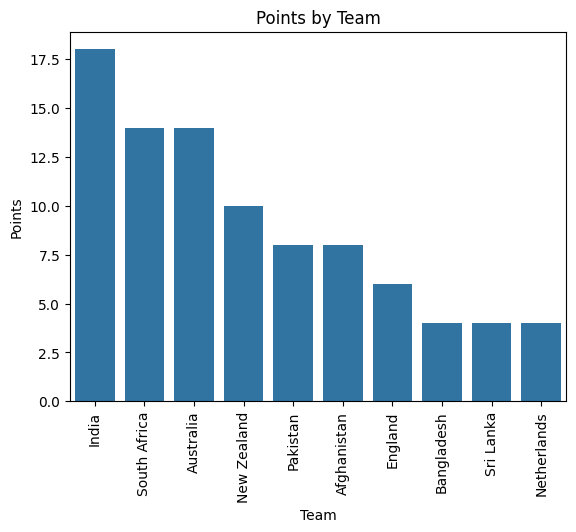

In [17]:
sns.barplot(x='Team', y='Points', data=points_table)
plt.title('Points by Team')
plt.xticks(rotation=90)
plt.show()


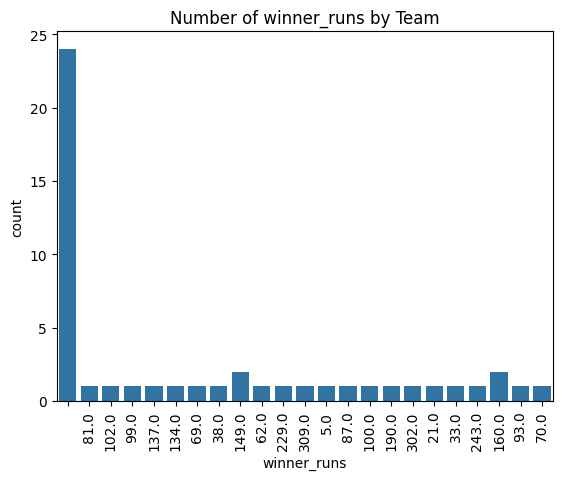

In [18]:
sns.countplot(x='winner_runs', data=matches)
plt.title('Number of winner_runs by Team')
plt.xticks(rotation=90)
plt.show()

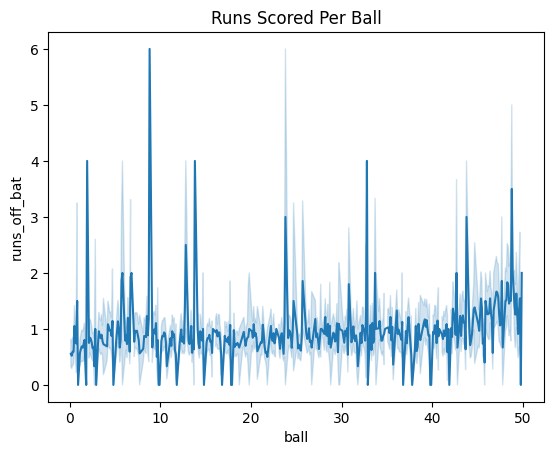

In [19]:
sns.lineplot(x='ball', y='runs_off_bat', data=deliveries)
plt.title('Runs Scored Per Ball')
plt.show()

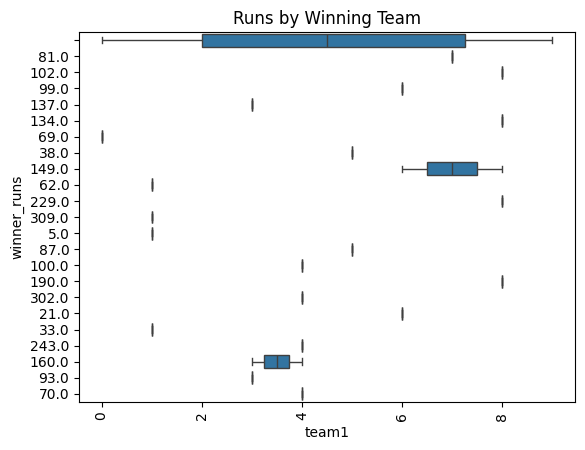

In [20]:
sns.boxplot(x='team1', y='winner_runs', data=matches)
plt.title('Runs by Winning Team')
plt.xticks(rotation=90)
plt.show()

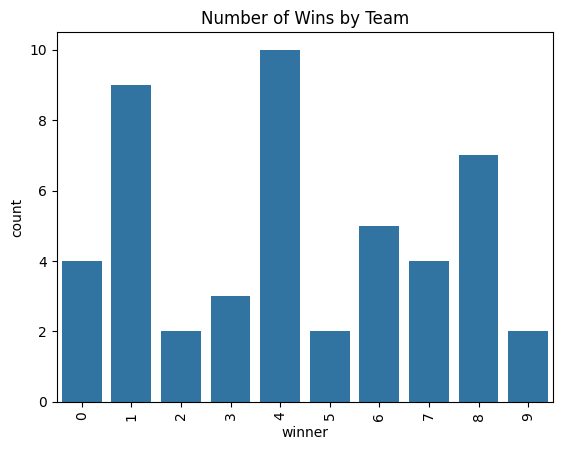

In [21]:
sns.countplot(x='winner', data=matches)
plt.title('Number of Wins by Team')
plt.xticks(rotation=90)
plt.show()

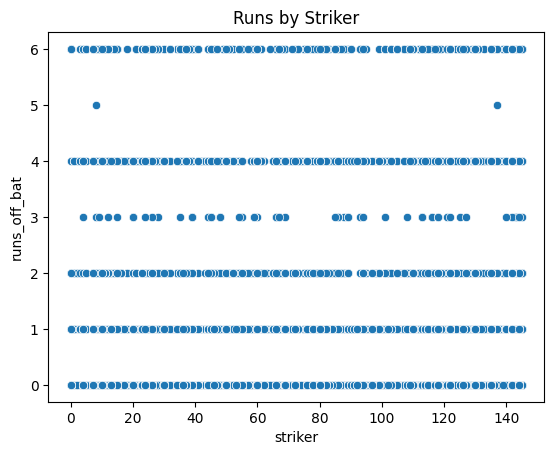

In [22]:
sns.scatterplot(x='striker', y='runs_off_bat', data=deliveries)
plt.title('Runs by Striker')
plt.show()

In [23]:
# Random Forest
X = deliveries[['ball', 'batting_team', 'bowling_team', 'striker', 'bowler']]
y = deliveries['runs_off_bat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Support Vector Machine
svm = SVR()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


In [24]:
# Random Forest Evaluation
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
print(f'Random Forest RMSE: {rf_rmse}')
print(f'Random Forest R²: {rf_r2}')

# SVM Evaluation
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_pred))
svm_r2 = r2_score(y_test, svm_pred)
print(f'SVM RMSE: {svm_rmse}')
print(f'SVM R²: {svm_r2}')


Random Forest RMSE: 1.578596883095601
Random Forest R²: -0.24634330015692396
SVM RMSE: 1.5067639357261475
SVM R²: -0.1354960693827849


In [25]:
from sklearn.linear_model import LinearRegression


In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)
print(f'Linear Regression RMSE: {lr_rmse}')
print(f'Linear Regression R²: {lr_r2}')

Linear Regression RMSE: 1.4104299717430213
Linear Regression R²: 0.005056869383511908


In [27]:
pip install PyQt5


Deliveries columns: Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')
Matches columns: Index(['season', 'team1', 'team2', 'date', 'match_number', 'venue', 'city',
       'toss_winner', 'toss_decision', 'player_of_match', 'umpire1', 'umpire2',
       'reserve_umpire', 'match_referee', 'winner', 'winner_runs',
       'winner_wickets', 'match_type'],
      dtype='object')
Points columns: Index(['Ranking', 'Team', 'Matches', 'Won', 'Lost', 'Tie', 'No Results',
       'Points', 'Net Run Rate', 'For', 'Against'],
      dtype='object')


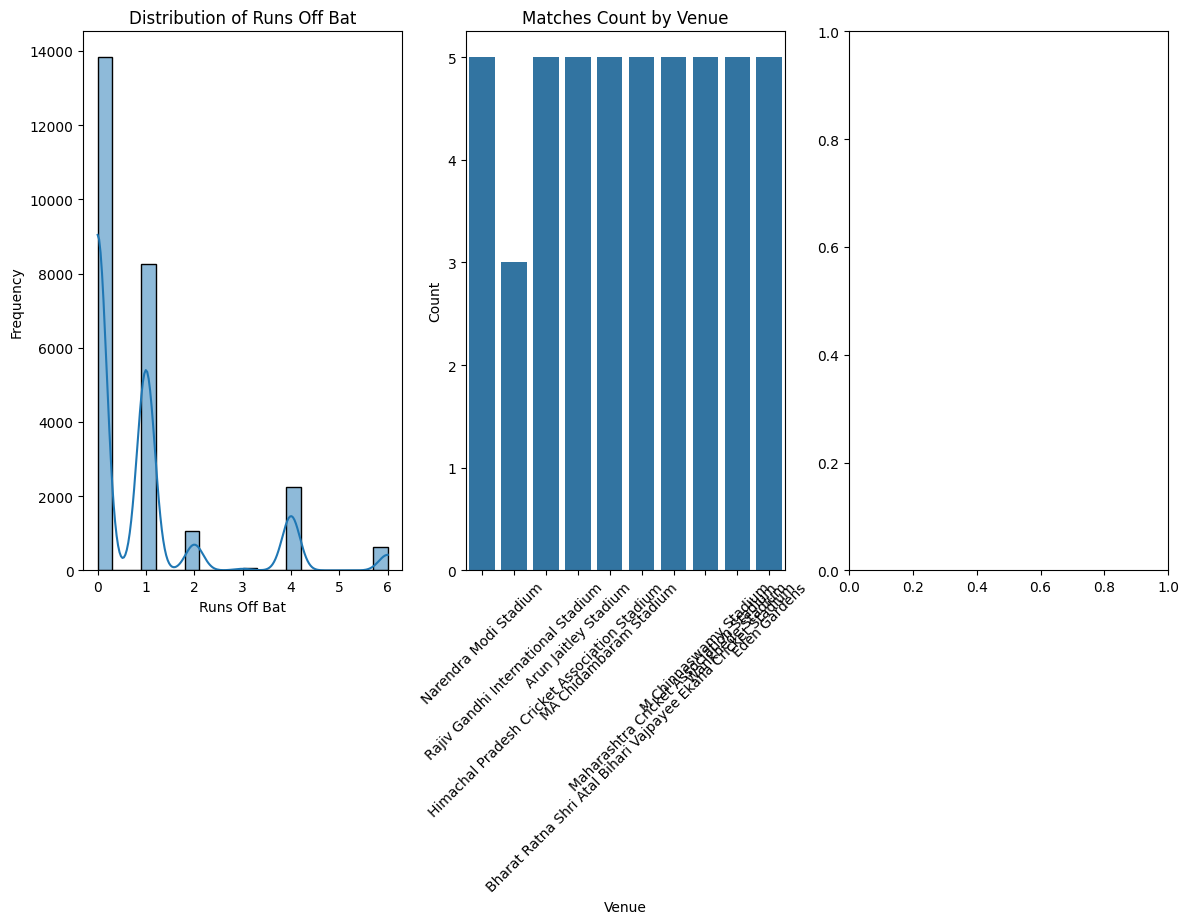

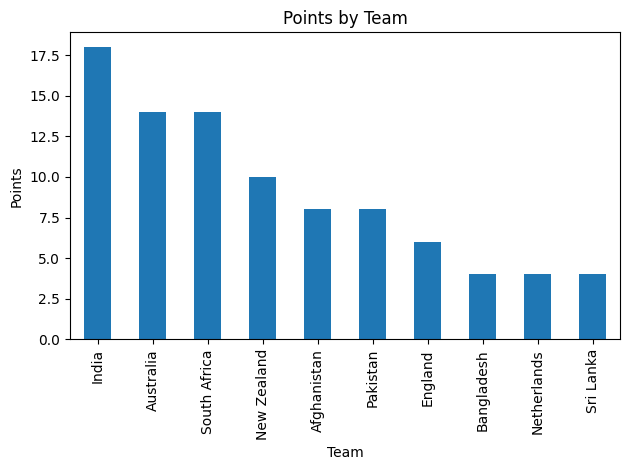

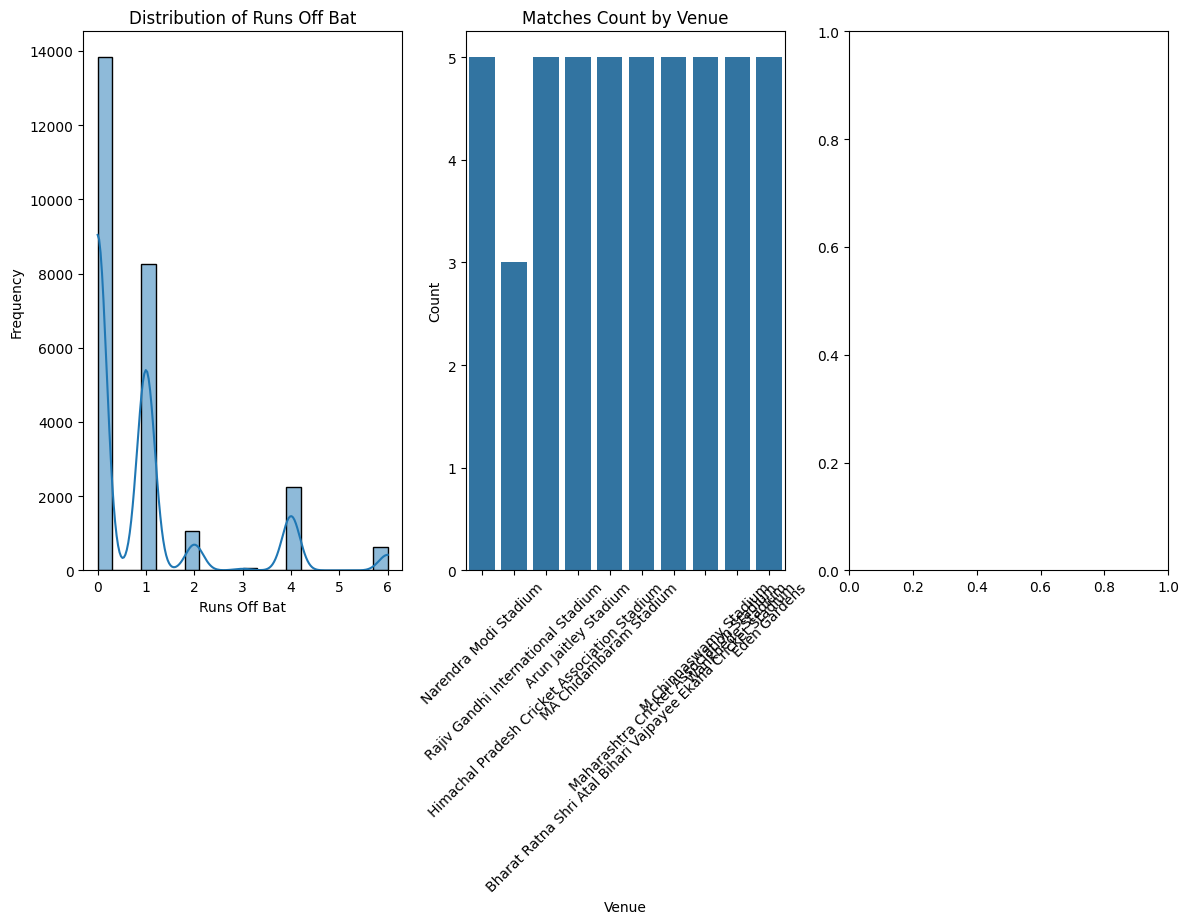

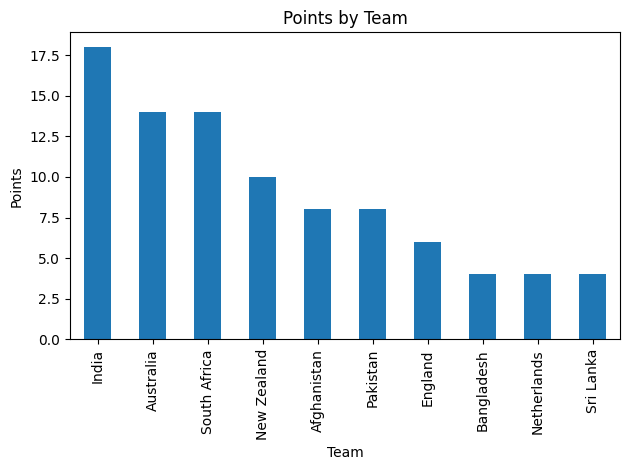

SystemExit: 0

C:\Users\Data Care Services\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
import sys
from PyQt5.QtWidgets import QApplication, QMainWindow, QPushButton, QVBoxLayout, QWidget, QFileDialog, QLabel, QTextEdit
from PyQt5.QtCore import Qt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class DataScienceApp(QMainWindow):
    def __init__(self):
        super().__init__()

        self.deliveries = None
        self.matches = None
        self.points = None

        self.initUI()

    def initUI(self):
        self.setWindowTitle('Data Science Project: India World Cup Analysis')

        # Create widgets
        self.loadButton = QPushButton('Load Datasets', self)
        self.visualizeButton = QPushButton('Show Visualization', self)
        self.describeButton = QPushButton('Show Descriptive Stats', self)
        self.resultLabel = QLabel('Results will be displayed here', self)
        self.resultTextEdit = QTextEdit(self)
        self.resultTextEdit.setReadOnly(True)

        # Connect buttons to functions
        self.loadButton.clicked.connect(self.load_datasets)
        self.visualizeButton.clicked.connect(self.show_visualization)
        self.describeButton.clicked.connect(self.show_descriptive_stats)

        # Set layout
        layout = QVBoxLayout()
        layout.addWidget(self.loadButton)
        layout.addWidget(self.visualizeButton)
        layout.addWidget(self.describeButton)
        layout.addWidget(self.resultLabel)
        layout.addWidget(self.resultTextEdit)

        # Set main widget
        mainWidget = QWidget()
        mainWidget.setLayout(layout)
        self.setCentralWidget(mainWidget)

    def load_datasets(self):
        # Ask for multiple files
        deliveries_path, _ = QFileDialog.getOpenFileName(self, 'Open Deliveries Dataset', '', 'CSV Files (*.csv)')
        matches_path, _ = QFileDialog.getOpenFileName(self, 'Open Matches Dataset', '', 'CSV Files (*.csv)')
        points_path, _ = QFileDialog.getOpenFileName(self, 'Open Points Dataset', '', 'CSV Files (*.csv)')

        if deliveries_path and matches_path and points_path:
            try:
                # Load datasets
                self.deliveries = pd.read_csv(deliveries_path)
                self.matches = pd.read_csv(matches_path)
                self.points = pd.read_csv(points_path)
                
                # Print columns to debug
                print("Deliveries columns:", self.deliveries.columns)
                print("Matches columns:", self.matches.columns)
                print("Points columns:", self.points.columns)
                
                self.resultLabel.setText('Datasets Loaded Successfully')
            except Exception as e:
                self.resultLabel.setText(f'Error loading datasets: {e}')
        else:
            self.resultLabel.setText('Please load all datasets')

    def show_visualization(self):
        if self.deliveries is None or self.matches is None or self.points is None:
            self.resultLabel.setText('Please load all datasets')
            return

        try:
            # Example visualizations
            plt.figure(figsize=(14, 7))

            # Visualization 1: Distribution of Runs Off Bat
            plt.subplot(1, 3, 1)
            sns.histplot(self.deliveries['runs_off_bat'], bins=20, kde=True)
            plt.title('Distribution of Runs Off Bat')
            plt.xlabel('Runs Off Bat')
            plt.ylabel('Frequency')

            # Visualization 2: Matches Count by Venue
            plt.subplot(1, 3, 2)
            sns.countplot(data=self.matches, x='venue')
            plt.title('Matches Count by Venue')
            plt.xlabel('Venue')
            plt.ylabel('Count')
            plt.xticks(rotation=45)

            # Visualization 3: Points Table
            plt.subplot(1, 3, 3)
            points_summary = self.points.groupby('Team').agg({'Points': 'sum'}).sort_values('Points', ascending=False)
            points_summary.plot(kind='bar', legend=False)
            plt.title('Points by Team')
            plt.xlabel('Team')
            plt.ylabel('Points')

            plt.tight_layout()
            plt.show()

            self.resultLabel.setText('Visualizations displayed successfully')
        except Exception as e:
            self.resultLabel.setText(f'Error: {e}')

    def show_descriptive_stats(self):
        if self.deliveries is None or self.matches is None or self.points is None:
            self.resultLabel.setText('Please load all datasets')
            return

        try:
            # Combine all datasets for descriptive stats
            combined_data = pd.concat([self.deliveries, self.matches, self.points], axis=1, join='inner')
            stats = combined_data.describe(include='all')
            self.resultTextEdit.setPlainText(stats.to_string())
            self.resultLabel.setText('Descriptive statistics displayed successfully')
        except Exception as e:
            self.resultLabel.setText(f'Error: {e}')

if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = DataScienceApp()
    ex.show()
    sys.exit(app.exec_())
